<a href="https://colab.research.google.com/github/emmanuellfc/EM_Tufts_Fall2023/blob/main/PoissonRectangle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

In [2]:
# Import Packages
from fenics import *
import mshr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.transforms as trans
import matplotlib.gridspec as gridspec

In [3]:
## Define the mesh
x, y = 2, 1
gridx, gridy = 20, 10
mesh = RectangleMesh(Point(0,0), Point(x, y), gridx, gridy, "crossed")

## Define function space
V = FunctionSpace(mesh, "CG", 1)

In [4]:
## Define boundaty conditions

def upper_side(x, on_boundary):
    if near(x[1], y) and on_boundary:
        return True

def lower_side(x, on_boundary):
    if near(x[1], 0) and on_boundary:
        return True

## Define the potential in the bottom and lower sides of the grometry
v_0 = Constant(2.0) # Upper potential
v_1 = Constant(4.0) # Lower potential
top_bc = DirichletBC(V, v_1, upper_side)
bot_bc = DirichletBC(V, v_0, lower_side)

## Collect boundary conditions
bcs = [top_bc, bot_bc]

In [5]:
## Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

## Solve variational problem
u = Function(V)
solve(a == L, u, bcs)

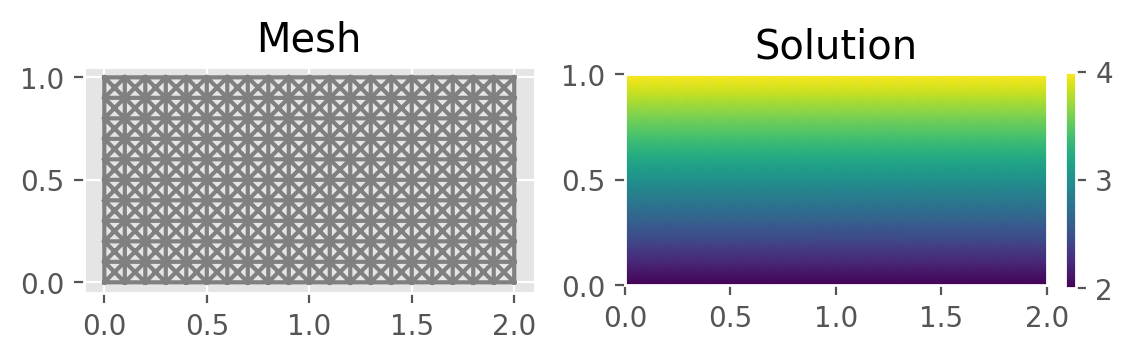

In [6]:
## Plotting the mesh and the solution.
plt.figure(dpi=200)                       # Set the resolution
plt.style.use('ggplot')                   # Use the ggplot style
plt.rcParams["figure.autolayout"] = True
gs1 = gridspec.GridSpec(2,2)
plt.subplot(121)
plot(mesh, title = 'Mesh')
plt.subplot(122)
plot(u, title = 'Solution')              # Set the title
c = plot(interpolate(u, V), mode='color')   # Define the the colorbar
plt.colorbar(c, fraction = 0.024, pad=0.04) # fraction and pad to keep the colorbar scaled to the plot
#plt.savefig('Poisson_Mesh_and_Sol.png',dpi=200) # Savefig
plt.show()